#**PRACTICE-4:**

#Design a model to predict the housing price from Boston Dataset using Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib  inline

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Data Sets/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#let's plot all the columns to look at their distributions
for i in df.columns:
  plt.figure(figsize=(7,4))
  sns.histplot(data=df,x=i,kde=True)
  plt.show()

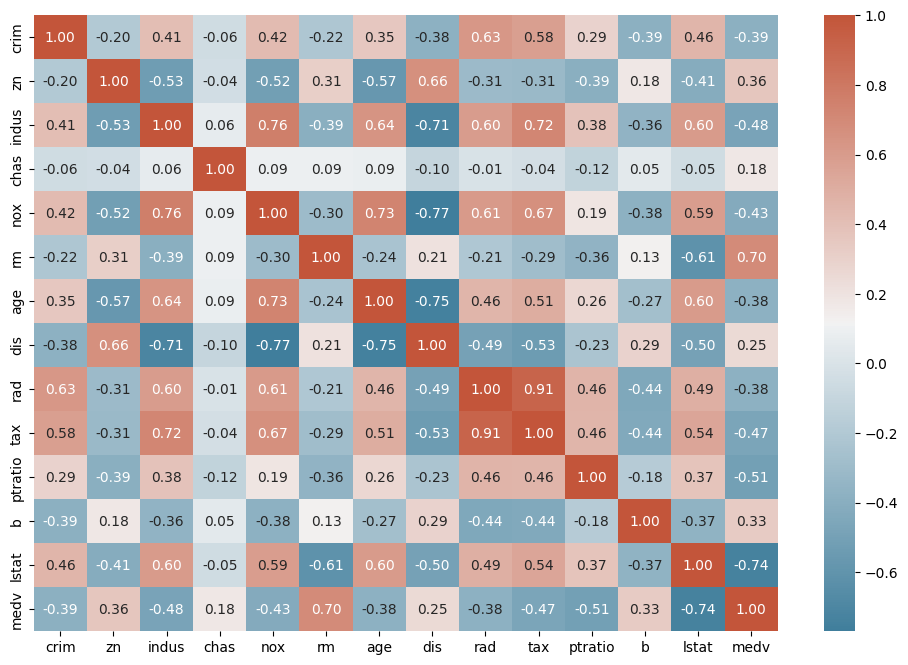

In [ ]:
plt.figure(figsize=(12,8))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap)
plt.show()

In [ ]:
Y=df['medv']
X=df.drop(columns={'medv'})

In [ ]:
#splitting the data in 70:30 ratio of train to test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model=LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
b=lin_model.coef_
m=lin_model.intercept_

In [ ]:
b

array([-9.85424717e-02,  6.07841138e-02,  5.91715401e-02,  2.43955988e+00,
       -2.14699650e+01,  2.79581385e+00,  3.57459778e-03, -1.51627218e+00,
        3.07541745e-01, -1.12800166e-02, -1.00546640e+00,  6.45018446e-03,
       -5.68834539e-01])

In [ ]:
m

46.396493871823864

In [ ]:
from sklearn.metrics import r2_score
#model evaluation for training set '
y_train_predict=lin_model.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2=r2_score(y_train,y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.849055005805464
R2 score is 0.7103879080674731




In [ ]:
from sklearn.metrics import r2_score
#model evaluation for training set '
y_test_predict=lin_model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_predict)))
r2=r2_score(y_test,y_test_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")



The model performance for training set
--------------------------------------
RMSE is 4.453237437198149
R2 score is 0.7836295385076292




#**HW:**
#1.Write the regression equation ypred=m+b0x1+b1x2+-------------------b12x13
# 2.Select one datasample from the dataset
#3.find ypred value
#4.find the absolute error for ypred and yactual


In [ ]:
l=[]
l=list(df.iloc[3])
b=list(b)
print(l)
print(b)



[0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4]
[-0.09854247168320542, 0.060784113842432486, 0.05917154006562941, 2.4395598751549907, -21.469964963213876, 2.7958138545358477, 0.0035745977759409353, -1.516272184239845, 0.30754174546451496, -0.0112800166353971, -1.0054664025594304, 0.006450184460881397, -0.5688345385334749]


In [ ]:
ypred=m
for i in range(len(b)):
  ypred=ypred+(b[i]*l[i])
print(ypred)



27.71523331907101


In [ ]:
res=l[13]-ypred
print(res)




5.684766680928988
